<a href="https://colab.research.google.com/github/liamlio/IEEEFraudDetectionComp/blob/master/Deep_Learning_Approach_to_IEEE_Fraud_Kaggle_Comp_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()
#Upload your kaggle.json api key

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liamlio","key":"32d0c187f3ae18696e9889dd18b5baf3"}'}

In [0]:
#Moving the kaggle.json file into the .kaggle/ directory
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c ieee-fraud-detection 
#Download the dataset from the kaggle api

 76% 40.0M/52.5M [00:01<00:00, 24.9MB/s]
100% 52.5M/52.5M [00:01<00:00, 35.1MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 98.9MB/s]
 78% 37.0M/47.3M [00:00<00:00, 40.7MB/s]
100% 47.3M/47.3M [00:00<00:00, 96.3MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 99.0MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 146MB/s]


In [0]:
#unzip all the dataset (this will take a minute to appear in the /content directory)
import zipfile
with zipfile.ZipFile("test_identity.csv.zip","r") as zip_ref:
    zip_ref.extractall('/content')
with zipfile.ZipFile("test_transaction.csv.zip","r") as zip_ref:
    zip_ref.extractall('/content')
with zipfile.ZipFile("train_identity.csv.zip","r") as zip_ref:
    zip_ref.extractall('/content')
with zipfile.ZipFile("train_transaction.csv.zip","r") as zip_ref:
    zip_ref.extractall('/content')

In [0]:
!rm test_transaction.csv.zip
!rm train_identity.csv.zip
!rm train_transaction.csv.zip
!rm test_identity.csv.zip

In [0]:
#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [0]:
#Putting our data into dataframes
%cd /content
train_id = pd.read_csv('train_identity.csv')
train_tr = pd.read_csv('train_transaction.csv')


/content


So the transaction dataframe is split into multiple id's where id's 1-11, are continuous data and the rest are categorical.

In [0]:
#Let's merge the datasets for convenience
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')

In [0]:
del train_id
del train_tr

In [0]:
#Splitting the data
X = train.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)



#test = test[['TransactionID', 'TransactionDT']]


In [0]:
# by https://www.kaggle.com/dimartinot
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
X = clean_inf_nan(X)
#X_test = clean_inf_nan(X_test)

In [0]:
from fastai.tabular import * 
from fastai.vision import *
from sklearn.model_selection import train_test_split
import pandas as pd
#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
# del train
# del test


In [0]:
# class Mish(nn.Module):
#   def __init__(self):
#     super.__init__()
#     print("Mish activation loaded..")
#   def forward(self, x):
#     x = x * (torch.tanh(F.softplus(x)))
#     return(x)

In [0]:
!git clone https://github.com/sdoria/mish #SOTA optimizers and activations functions

Cloning into 'mish'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 46 (delta 21), reused 19 (delta 6), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [0]:
#Functions
%cd mish
from rangerlars import *
from mish import *
from mxresnet import *
from ranger import *

/content/mish
Mish activation loaded...


In [0]:
from fastai.callbacks import *

In [0]:
def flattenAnneal(learn:Learner, lr:float, n_epochs:int, start_pct:float):
  n = len(learn.data.train_dl)
  anneal_start = int(n*n_epochs*start_pct)
  anneal_end = int(n*n_epochs) - anneal_start
  phases = [TrainingPhase(anneal_start).schedule_hp('lr', lr),
           TrainingPhase(anneal_end).schedule_hp('lr', lr, anneal=annealing_cos)]
  sched = GeneralScheduler(learn, phases)
  learn.callbacks.append(sched)
  learn.fit(n_epochs)

In [0]:
# opt_func = partial(Ranger, betas=(0.95,0.99), eps=1e-6)
# learn = tabular_learner(data, layers=[400,200], wd=1e-2, opt_func=opt_func,
#                bn_wd=False, true_wd=True, loss_func=LabelSmoothingCrossEntropy(),
#                metrics=accuracy)

In [0]:
#learn.fit_one_cycle(1, 1e-2)
#flattenAnneal(learn, 4e-3, 10, 0.72)
#learn.fit(1)

In [0]:
#X = pd.read_csv('/content/processedfraudX.csv')
# learn.predict(test)

In [0]:
# df.shape, test.shape

In [0]:
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
            'P_emaildomain']

In [0]:
#The fact that it's NaN could be a good indicator
for col in X.columns:
  if col in cat_cols:
    X[col].fillna('NaN')

In [0]:
X.shape,X_test.shape

((590540, 432), (506691, 431))

In [0]:
dep_var = 'isFraud'
cont_cols = list(set(X.columns)-set(cat_cols)-{dep_var})
# Following SafeBox Kernel
drop_col = ['V300', 'V309', 'V111', 
            'C3', 'V124', 'V106', 'V125', 'V315', 'V134', 'V102', 'V123', 'V316', 
            'V113', 'V136', 'V305', 'V110', 'V299', 'V289', 'V286', 'V318', 'V103', 
            'V304', 'V116', 'V298', 'V284', 'V293', 'V137', 'V295', 'V301', 'V104', 
            'V311', 'V115', 'V109', 'V119', 'V321', 'V114', 'V133', 'V122', 'V319', 
            'V105', 'V112', 'V118', 'V117', 'V121', 'V108', 'V135', 'V320', 'V303', 
            'V297', 'V120']
for c in drop_col:
    if c in cat_cols:
        cat_cols.remove(c)
    else:
        cont_cols.remove(c)

In [0]:
embed_cat_cols = {}
for col in cat_cols:
  embed_cat_cols[col] = 10

In [0]:
wd = 0.2
bs = 4096
#label_cls = CategoryList
procs = [FillMissing, Categorify, Normalize]
metrics = [AUROC()]


In [0]:
path = '/content'
valid_idx = range(int(np.ceil(len(X)-0.1*len(X))), len(X))
data = TabularDataBunch.from_df(path, X, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_cols, 
                                cont_names=cont_cols, bs=bs)


In [0]:
#act_fn = Mish()
#opt_func = partial(Ranger, betas=(0.95,0.99), eps=1e-6)
learn = tabular_learner(data, layers=[200, 100], emb_szs=embed_cat_cols,
               bn_wd=False, true_wd=True, #loss_func=LabelSmoothingCrossEntropy(),
               metrics=metrics, ps=[0.001, 0.01], emb_drop=0.04) 

In [0]:
del embed_cat_cols

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


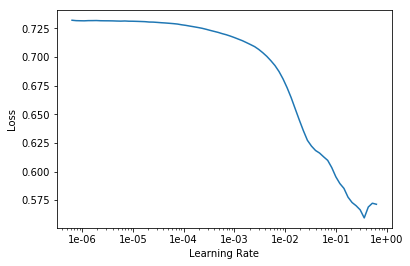

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,1e-2)
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,auroc,time
0,0.268698,0.294945,0.859698,02:51


epoch,train_loss,valid_loss,auroc,time
0,0.243599,0.273110,0.863442,02:52
1,0.242098,0.279588,0.876056,02:52
2,0.240163,0.776188,0.880178,02:52


In [0]:
from fastai.callbacks.tracker import EarlyStoppingCallback
cbs=[EarlyStoppingCallback(learn, monitor='auroc', min_delta=0.001, patience=3, )]

learn.fit_one_cycle(30, 1e-4, wd=0.2, callbacks=cbs)

epoch,train_loss,valid_loss,auroc,time
0,0.239436,0.273771,0.881989,02:52
1,0.239757,0.599567,0.882789,02:52
2,0.239990,0.347767,0.881386,02:52
3,0.239530,0.275770,0.878385,02:52


Epoch 4: early stopping


In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'AI/ML'
# learn.save('IEEE_1_uh')

In [0]:
#learn.load('IEEE_1_uh')

In [0]:
#flattenAnneal(learn, 1e-1, 1, 0.72)

In [0]:
filename='ieee'
!mkdir models
learn.export(f'models/{filename}.pkl')

mkdir: cannot create directory ‘models’: File exists


In [0]:
del learn
del X
import gc
del data
gc.collect()

15575

In [0]:
%cd /content
test_id = pd.read_csv('test_identity.csv')
test_tr = pd.read_csv('test_transaction.csv')
test = pd.merge(test_tr, test_id, on='TransactionID', how='left')
X_test = test.drop(['TransactionID', 'TransactionDT'], axis=1)
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   
# Cleaning infinite values to NaN
X_test = clean_inf_nan(X_test)
for col in X_test.columns:
  if col in cat_cols:
    X_test[col].fillna('NaN')

/content


In [0]:
X_test[dep_var] = 0

In [0]:
learn = load_learner('',f'models/{filename}.pkl',
                     TabularList(X_test, path=path, cont_names=cont_cols, 
                                 cat_names=cat_cols, procs=procs), 
                     bs=bs)

1.0.57


In [0]:
test_preds, targs = learn.get_preds(ds_type=DatasetType.Test)